In [1]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans

In [2]:
customers_df= pd.read_csv('data/olist_customers_dataset.csv')
geolocation_df= pd.read_csv("data/olist_geolocation_dataset.csv")
items_df= pd.read_csv('data/olist_order_items_dataset.csv')
payments_df= pd.read_csv('data/olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('data/olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('data/olist_orders_dataset.csv')
products_df= pd.read_csv('data/olist_products_dataset.csv')
sellers_df= pd.read_csv('data/olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('data/product_category_name_translation.csv')

In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
payments_df['order_id'].is_unique

False

In [8]:
payments_df.shape

(103886, 5)

In [9]:
payments_df[['order_id', 'payment_type', 'payment_sequential']].drop_duplicates().shape

(103886, 3)

In [10]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
reviews_df.shape

(99224, 7)

In [12]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
orders_df.loc[orders_df['customer_id']=='c57b4b6f3719475543b721e720a526ad']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
68560,3c8194a8d47f5852dcd52ccbf364596e,c57b4b6f3719475543b721e720a526ad,delivered,2017-11-27 12:44:25,2017-11-27 12:56:18,2017-11-30 19:25:50,2017-12-01 17:05:02,2017-12-11 00:00:00


In [14]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [17]:
#merge dataframes 
data = pd.merge(orders_df, customers_df, on='customer_id', how='left')
data = pd.merge(data, items_df, on='order_id', how='left')
data = pd.merge(data, payments_df, on='order_id', how='left')
data = pd.merge(data, reviews_df, on='order_id', how='left')
data = pd.merge(data, sellers_df, on='seller_id', how='left')
data = pd.merge(data, products_df, on='product_id', how='left')
data = pd.merge(data, category_translation_df, on='product_category_name', how='left')

In [18]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,31570.0,belo horizonte,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,14840.0,guariba,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [19]:
data['product_name_lenght'].value_counts(dropna=False)

59.0    8679
60.0    8070
56.0    6847
58.0    6819
57.0    6302
        ... 
7.0        2
69.0       1
68.0       1
76.0       1
66.0       1
Name: product_name_lenght, Length: 67, dtype: int64

In [20]:
data.loc[data['customer_unique_id'].duplicated()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,1.0,credit_card,1.0,8.34,abc5655186d40772bd6e410420e6a3ed,5.0,NaN,NaN,2017-08-17 00:00:00,2017-08-18 01:47:32,8577.0,itaquaquecetuba,SP,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,office_furniture
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,1.0,credit_card,1.0,259.06,15898b543726a832d4137fbef5d1d00e,1.0,NaN,Aguardando retorno da loja,2017-05-30 00:00:00,2017-05-30 23:13:47,29156.0,cariacica,ES,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,garden_tools
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23 00:00:00,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,1.0,c35498fbb4358837ae16850f50c3fd22,70a12e78e608ac31179aea7f8422044b,2017-11-01 16:07:35,76.00,16.97,3.0,voucher,1.0,24.86,219cf59cf889bc85babbd1cd1fe30f2d,4.0,NaN,NaN,2017-11-09 00:00:00,2017-11-10 01:06:29,12327.0,jacarei,SP,telefonia,59.0,973.0,1.0,325.0,19.0,8.0,22.0,telephony


In [21]:
data.loc[data['customer_unique_id']=='7c396fd4830fd04220f754e42b4e5bff'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
74257,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,2017-09-11 11:43:25,35.39,8.72,1.0,credit_card,1.0,44.11,493e9a0b23de35d37871a6e8940f822a,5.0,NaN,O produto está ok e foi entregue bem antes do ...,2017-09-06 00:00:00,2017-09-07 00:44:35,7025.0,guarulhos,SP,bebes,35.0,2395.0,1.0,350.0,19.0,14.0,12.0,baby


In [22]:
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [23]:
df = data[['customer_id', 'customer_unique_id','order_id', 'product_id',
       'price', 'review_id', 'review_score', 'product_category_name']]

In [24]:
df.head()

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
3,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,118.70,8d5266042046a06655c8db133d120ba5,4.0,perfumaria
4,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,159.90,e73b67b67587f7644d5bd1a52deb1b01,5.0,automotivo


In [25]:
df.loc[df['customer_unique_id']=='7c396fd4830fd04220f754e42b4e5bff'].head()

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name
0,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
74257,31f31efcb333fcbad2b1371c8cf0fa84,7c396fd4830fd04220f754e42b4e5bff,69923a4e07ce446644394df37a710286,9abb00920aae319ef9eba674b7d2e6ff,35.39,493e9a0b23de35d37871a6e8940f822a,5.0,bebes


In [26]:
data.loc[data['order_id']=='e481f51cbdc54678b7cc49136f2d6af7'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350.0,maua,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [27]:
df.loc[df.duplicated()]

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas
12,31ad1d1b63eb9962463f764d4e6e0c9d,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,9a78fb9862b10749a117f7fc3c31f051,149.99,abc5655186d40772bd6e410420e6a3ed,5.0,moveis_escritorio
14,494dded5b201313c64ed7f100595b95c,f2a85dec752b8517b5e58a06ff3cd937,e6ce16cb79ec1d90b1da9085a6118aeb,08574b074924071f4e201e151b152b4e,99.00,15898b543726a832d4137fbef5d1d00e,1.0,ferramentas_jardim
24,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,83018ec114eee8641c97e08f7b4e926f,c35498fbb4358837ae16850f50c3fd22,76.00,219cf59cf889bc85babbd1cd1fe30f2d,4.0,telefonia
...,...,...,...,...,...,...,...,...
119111,609b9fb8cad4fe0c7b376f77c8ab76ad,fb9310710003399b031add3e55f34719,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,356.00,f5453b3d33358ed459eb4312392b96a8,4.0,esporte_lazer
119131,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,c982dbea53b864f4d27c1d36f14b6053,42.11,ebd75732b5804e934123d11ec1f11db0,5.0,brinquedos
119133,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,49d2e2460386273b195e7e59b43587c3,26.90,ebd75732b5804e934123d11ec1f11db0,5.0,brinquedos
119135,f01a6bfcc730456317e4081fe0c9940e,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,9fc063fd34fed29ccc57b7f8e8d03388,370.00,e8995c053d3db2d9c07407efe7de52dd,5.0,beleza_saude


In [28]:
data.loc[data[['customer_id', 'customer_unique_id', 'order_id', 'product_id', 'price',
       'review_id', 'review_score', 'product_category_name', 'order_item_id','payment_sequential']].duplicated()].shape

(0, 40)

In [29]:
df = data[['customer_id', 'customer_unique_id', 'order_id', 'product_id', 'price',
       'review_id', 'review_score', 'product_category_name', 'order_item_id','payment_sequential']]

In [30]:
df['payment_sequential'].value_counts(dropna=False)

1.0     113999
2.0       3415
3.0        658
4.0        322
5.0        194
6.0        136
7.0         94
8.0         63
9.0         51
10.0        42
11.0        36
12.0        28
13.0        16
14.0        13
15.0        11
19.0         9
18.0         9
16.0         9
17.0         9
21.0         6
20.0         6
22.0         3
NaN          3
25.0         2
26.0         2
23.0         2
24.0         2
27.0         1
29.0         1
28.0         1
Name: payment_sequential, dtype: int64

In [31]:
df.loc[df[['customer_unique_id']].duplicated()]

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name,order_item_id,payment_sequential
1,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas,1.0,3.0
2,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,29.99,a54f0611adc9ed256b57ede6b6eb5114,4.0,utilidades_domesticas,1.0,2.0
12,31ad1d1b63eb9962463f764d4e6e0c9d,299905e3934e9e181bfb2e164dd4b4f8,e69bfb5eb88e0ed6a785585b27e16dbf,9a78fb9862b10749a117f7fc3c31f051,149.99,abc5655186d40772bd6e410420e6a3ed,5.0,moveis_escritorio,1.0,1.0
14,494dded5b201313c64ed7f100595b95c,f2a85dec752b8517b5e58a06ff3cd937,e6ce16cb79ec1d90b1da9085a6118aeb,08574b074924071f4e201e151b152b4e,99.00,15898b543726a832d4137fbef5d1d00e,1.0,ferramentas_jardim,2.0,1.0
24,7f8c8b9c2ae27bf3300f670c3d478be8,634f09f6075fe9032e6c19609ffe995a,83018ec114eee8641c97e08f7b4e926f,c35498fbb4358837ae16850f50c3fd22,76.00,219cf59cf889bc85babbd1cd1fe30f2d,4.0,telefonia,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
119131,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,c982dbea53b864f4d27c1d36f14b6053,42.11,ebd75732b5804e934123d11ec1f11db0,5.0,brinquedos,1.0,2.0
119132,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,49d2e2460386273b195e7e59b43587c3,26.90,ebd75732b5804e934123d11ec1f11db0,5.0,brinquedos,2.0,1.0
119133,da2124f134f5dfbce9d06f29bdb6c308,c716cf2b5b86fb24257cffe9e7969df8,9115830be804184b91f5c00f6f49f92d,49d2e2460386273b195e7e59b43587c3,26.90,ebd75732b5804e934123d11ec1f11db0,5.0,brinquedos,2.0,2.0
119135,f01a6bfcc730456317e4081fe0c9940e,e03dbdf5e56c96b106d8115ac336f47f,aa04ef5214580b06b10e2a378300db44,9fc063fd34fed29ccc57b7f8e8d03388,370.00,e8995c053d3db2d9c07407efe7de52dd,5.0,beleza_saude,1.0,1.0


In [32]:
df['customer_unique_id'].value_counts(dropna=False)

9a736b248f67d166d2fbb006bcb877c3    75
6fbc7cdadbb522125f4b27ae9dee4060    38
f9ae226291893fda10af7965268fb7f6    35
8af7ac63b2efbcbd88e5b11505e8098a    29
569aa12b73b5f7edeaa6f2a01603e381    26
                                    ..
f04534e01ef384f6f11113da312438a8     1
428500ebef8dbc008de191d598942b47     1
0c4849ec22b169a6ed1b74d50dabbe0a     1
fc91d9c645bd20c43a6c4589d21cbe17     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [33]:
df.loc[df['customer_unique_id']=='6fbc7cdadbb522125f4b27ae9dee4060', 'payment_sequential'].value_counts(dropna=False)

15.0    2
10.0    2
7.0     2
3.0     2
18.0    2
16.0    2
12.0    2
17.0    2
4.0     2
5.0     2
1.0     2
19.0    2
13.0    2
2.0     2
14.0    2
8.0     2
11.0    2
9.0     2
6.0     2
Name: payment_sequential, dtype: int64

In [34]:
df.drop(labels=['payment_sequential', 'order_item_id'], axis=1, inplace=True)

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.shape

(103805, 8)

In [37]:
df.loc[df['customer_unique_id'].duplicated(),'customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c    12
d97b3cfb22b0d6b25ac9ed4e9c2d481b    12
2e43e031f10de28e557c35ef668f9396    11
b09f1bff1aff13c997af071602bc048b    10
                                    ..
f9c5008b5774467d226007428a6bf7e3     1
719268f22cb2d1632471b52cfddcb420     1
efb8ed6fa72c7c97805c9b6b9592d3b0     1
4d99f702a7e13503bcba23438b7e7888     1
c716cf2b5b86fb24257cffe9e7969df8     1
Name: customer_unique_id, Length: 5951, dtype: int64

In [38]:
df.loc[df['customer_unique_id']=='8d50f5eadf50201ccdcedfb9e2ac8455']

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name
2803,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,c2213109a2cc0e75d55585b7aaac6d97,de7df82eb1e48c456b020c2cfb03aeed,26.99,ae4bcc3a247dd80b95ec803024afc142,5.0,esporte_lazer
4328,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,23427a6bd9f8fd1b51f1b1e5cc186ab8,5cb96c51c55f57503465e4d2558dc053,45.99,cb1172e327bba1a8784de2ecc9107c2e,5.0,esporte_lazer
6104,0bf8bf19944a7f8b40ba86fef778ca7c,8d50f5eadf50201ccdcedfb9e2ac8455,e3071b7624445af6e4f3a1b23718667d,88159bac10e3d4f4b69b157406c7f70f,39.90,fa2449a730e7e4a66f698977f6ab3802,5.0,esporte_lazer
13899,a682769c4bc10fc6ef2101337a6c83c9,8d50f5eadf50201ccdcedfb9e2ac8455,d3582fd5ccccd9cb229a63dfb417c86f,df473738565b52f77b4e22b328b41576,23.40,37ff8fc67fe30b4b716c39cf4c8f7314,5.0,construcao_ferramentas_ferramentas
19343,31dd055624c66f291578297a551a6cdf,8d50f5eadf50201ccdcedfb9e2ac8455,5837a2c844decae8a778657425f6d664,NaN,NaN,fe4defbc0ab6116a1e5a93741fde4b1d,1.0,NaN
22851,42dbc1ad9d560637c9c4c1533746f86d,8d50f5eadf50201ccdcedfb9e2ac8455,bf92c69b7cc70f7fc2c37de43e366173,e01bc2ad5c6f46c0f53f73379fcd602e,149.90,8858e37108a15029eef04f510161fb8a,5.0,esporte_lazer
29793,6289b75219d757a56c0cce8d9e427900,8d50f5eadf50201ccdcedfb9e2ac8455,6bdf325f0966e3056651285c0aed5aad,d6354128c28cc56532ba7393d9373083,51.80,4fb14394b2623c73eccc973685930f08,5.0,esporte_lazer
40454,dfb941d6f7b02f57a44c3b7c3fefb44b,8d50f5eadf50201ccdcedfb9e2ac8455,4f62d593acae92cea3c5662c76122478,94cc774056d3f2b0dc693486a589025e,13.99,cb44e7ba6bacbf6f348aec2b9ab56790,5.0,fashion_bolsas_e_acessorios
47300,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,b850a16d8faf65a74c51287ef34379ce,5bccc8fe44471df6c7b7e08176837d2f,13.99,68faf98deb4bc8c25eb42f07a1216f46,5.0,esporte_lazer
70323,1c62b48fb34ee043310dcb233caabd2e,8d50f5eadf50201ccdcedfb9e2ac8455,519203404f6116d406a970763ee75799,5fb61f482620cb672f5e586bb132eae9,69.90,c40b5c0ee4779d9f1c25da03503943e1,5.0,NaN


In [39]:
df.loc[df['price'].isnull()].shape

(778, 8)

In [40]:
df['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

In [41]:
df.sort_values(by='customer_unique_id', inplace=True)

In [42]:
df.loc[df['price'].isnull()]

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name,order_purchase_timestamp
47650,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,c306eca42d32507b970739b5b6a5a33a,NaN,NaN,a05a89a9daa1ef53175c02ff565ce0b5,4.0,NaN,2018-08-13 09:14:07
29879,20e569f30c28c88ac2731a006e5bb3d8,004ad212c650c96c8a48f30855a7bcb8,2c9c2c96702997c879d75f927b76165e,NaN,NaN,334bed8884f21b79fca0946a85c88256,1.0,NaN,2017-09-24 10:45:10
29089,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,df8c077268f7f3baaac0892eb3143642,NaN,NaN,3f793c533cf5b3e21425b1ab73568350,3.0,NaN,2017-02-01 00:04:17
11996,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,809a282bbd5dbcabb6f2f724fca862ec,NaN,NaN,69ac6a27fde9855ebeaaecac0f78058b,1.0,NaN,2016-09-13 15:24:19
3642,68f4ad79cc0c2ad06e19088f5c00e9fa,00f0b70fdcb8a6e1671b52a2472bd41f,ddaec6fff982b13e7e048b627a11d6da,NaN,NaN,f837bc2ce327c43a4a00f1c8d44fb3fe,1.0,NaN,2016-10-04 19:41:32
...,...,...,...,...,...,...,...,...,...
99265,0a7dbfcfdf274bc1e1965b91489ba2f9,ff222edf83338ca6b35f8e29871fa07a,259fe605870f08ddf83ebb61f204b9e1,NaN,NaN,2c7bbcaf13619e64df63a19bb8c62f2d,1.0,NaN,2017-08-17 08:58:59
80364,6cbea8a57483ec9eefcffbf5241657ee,ff28720521c749234b1ba19c9c986f4c,c60a44d6c46309c86882ffce00a0b412,NaN,NaN,7bf1f5ffc604eebac16cb1535f9ca847,1.0,NaN,2017-02-15 11:25:14
26570,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,81b7c7bbc8ec003eeb67d87441a6a148,NaN,NaN,abbfacb2964f74f6487c9c10ac46daa6,3.0,NaN,2018-08-20 09:03:23
95055,3483b2a9e678865616e7d1b69b28dd4c,ff36be26206fffe1eb37afd54c70e18b,47282cfe5747c1c19920f090e491d285,NaN,NaN,abbfacb2964f74f6487c9c10ac46daa6,3.0,NaN,2018-08-23 12:38:08


In [43]:
df['customer_unique_id'].value_counts(dropna=False)

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c    13
d97b3cfb22b0d6b25ac9ed4e9c2d481b    13
2e43e031f10de28e557c35ef668f9396    12
b09f1bff1aff13c997af071602bc048b    11
                                    ..
57a4605e79df700b6938a91d75637f1a     1
57a276a96c34facb968c12e61604e3c6     1
57a1e272ccd2a65aedb93d759c2c7743     1
57a19cec3f7011ed8b200abeb144c4a2     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [44]:
df['frequency'] = df.groupby('customer_unique_id')['customer_unique_id'].transform('count')

In [45]:
df['frequency'].value_counts(dropna=False)

1     90145
2      9638
3      2298
4       968
5       285
6       252
7        77
8        40
9        36
13       26
17       17
12       12
11       11
Name: frequency, dtype: int64

In [46]:
df['recency'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')

In [47]:
df.loc[df['frequency']>5].head(10)

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name,order_purchase_timestamp,frequency,recency
4723,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,e76572c2ae4cede1e3b2ead512423efe,58.67,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
4724,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,b09cd20111b8c27705b617c3b5af7608,168.98,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
4719,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,9eacfe990da87a66d7fc95e4f97bad14,168.98,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
4722,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,50046ff3c7e886839388c4532a5ba24f,58.67,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
4721,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,d5bf1e6386a450dd26acf14a6f41768f,58.67,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
4720,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,ac1fcaf7402bfbf019afdcce1a784ad4,58.67,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
76126,5e312b0d9bf5c91599eb42120e633b19,066ee6b9c6fc284260ff9a1274a82ca7,2455cbeb73fd04b170ca2504662f95ce,27761f21b03a32be1aad6ebaebddd747,69.90,8bf8045aab97acf15f02087cbbf7bde3,1.0,moveis_decoracao,2017-06-20 12:39:46,6,2017-06-20 12:39:46
76127,5e312b0d9bf5c91599eb42120e633b19,066ee6b9c6fc284260ff9a1274a82ca7,2455cbeb73fd04b170ca2504662f95ce,5caaa02918381c4ad59d38fdcd4a28b9,69.90,8bf8045aab97acf15f02087cbbf7bde3,1.0,moveis_decoracao,2017-06-20 12:39:46,6,2017-06-20 12:39:46
76128,5e312b0d9bf5c91599eb42120e633b19,066ee6b9c6fc284260ff9a1274a82ca7,2455cbeb73fd04b170ca2504662f95ce,f2bec64d5d795250be5e5ec2d38a19b6,69.90,8bf8045aab97acf15f02087cbbf7bde3,1.0,moveis_decoracao,2017-06-20 12:39:46,6,2017-06-20 12:39:46
76129,5e312b0d9bf5c91599eb42120e633b19,066ee6b9c6fc284260ff9a1274a82ca7,2455cbeb73fd04b170ca2504662f95ce,5dcd17b12ed2175d4fe6157e047d7be2,69.90,8bf8045aab97acf15f02087cbbf7bde3,1.0,moveis_decoracao,2017-06-20 12:39:46,6,2017-06-20 12:39:46


In [48]:
df.drop_duplicates(subset=['recency', 'customer_unique_id','price'], inplace=True)

In [49]:
df.loc[df['frequency']>5].head(10)

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name,order_purchase_timestamp,frequency,recency
4723,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,e76572c2ae4cede1e3b2ead512423efe,58.67,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
4724,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,b09cd20111b8c27705b617c3b5af7608,168.98,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26
76126,5e312b0d9bf5c91599eb42120e633b19,066ee6b9c6fc284260ff9a1274a82ca7,2455cbeb73fd04b170ca2504662f95ce,27761f21b03a32be1aad6ebaebddd747,69.90,8bf8045aab97acf15f02087cbbf7bde3,1.0,moveis_decoracao,2017-06-20 12:39:46,6,2017-06-20 12:39:46
31897,54918590c1343b0ed2380a9a48596493,12d8b5ed661190a3a08183644dfc504d,3cab5c70f370e7fa810658c551f8e2ce,f3dc2177cd7a26726dd80204c34dbb48,129.90,fe450c8880583efbf19210a31fe5d3e4,4.0,moveis_sala,2017-03-26 18:25:32,6,2018-05-02 11:58:28
41559,a6f0c75be71555a84a73cabdc58b45d8,12d8b5ed661190a3a08183644dfc504d,bb03daf7fc738a6fce908d083fd0f4aa,bc596794d92f7b9959fe0e7430354b52,259.90,bbab53c5339fbf596b3c2f0c498350e9,5.0,bebes,2018-03-13 13:32:06,6,2018-05-02 11:58:28
76065,5d4e8d00919712f3be00db60466306ef,12d8b5ed661190a3a08183644dfc504d,7c952ad04bbf75547b59e530fa2a30d3,e7db7c40ea6647c808d48581f1308d88,109.90,dba66cb4ab24301296e83165adbb4567,1.0,bebes,2018-02-26 22:45:04,6,2018-05-02 11:58:28
52820,1272872ac75fcbffe68e4cd8fbb48162,12d8b5ed661190a3a08183644dfc504d,b16a844a8a1b4998e1505f65a65d1e6a,09c3d39641970009c198caed304ccfc4,39.90,38b3294d2a9521a9779a3d770b8f65c3,5.0,bebes,2018-05-02 11:58:28,6,2018-05-02 11:58:28
76066,5d4e8d00919712f3be00db60466306ef,12d8b5ed661190a3a08183644dfc504d,7c952ad04bbf75547b59e530fa2a30d3,c2ece64199af7a53793ed9612a89a8cd,88.34,dba66cb4ab24301296e83165adbb4567,1.0,moveis_decoracao,2018-02-26 22:45:04,6,2018-05-02 11:58:28
52819,1272872ac75fcbffe68e4cd8fbb48162,12d8b5ed661190a3a08183644dfc504d,b16a844a8a1b4998e1505f65a65d1e6a,a0eef953cb25bc9ae40457e1c3c82946,69.90,38b3294d2a9521a9779a3d770b8f65c3,5.0,moveis_decoracao,2018-05-02 11:58:28,6,2018-05-02 11:58:28
98601,a969b9f8d923bc7fd97b578f7c499194,12f5d6e1cbf93dafd9dcc19095df0b3d,8a784d47854e4cbc5562362393d504db,d8c365a069853295a82caf595c2c8c8d,9.90,3d1a9381854446c25e98012c64bb5460,5.0,moveis_quarto,2017-01-05 14:18:03,6,2017-01-05 15:25:10


In [50]:
df['amount_spent'] = df.groupby('customer_unique_id')['price'].transform('sum')

In [51]:
df.loc[df['frequency']>5].head()

,customer_id,customer_unique_id,order_id,product_id,price,review_id,review_score,product_category_name,order_purchase_timestamp,frequency,recency,amount_spent
4723,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,e76572c2ae4cede1e3b2ead512423efe,58.67,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26,227.65
4724,c9dc6fff8500f3735822d5356bcb0e1b,0209f290b5451d357308bc0e90521026,aa0b425987bdeae4a29c616a2bc3a08a,b09cd20111b8c27705b617c3b5af7608,168.98,4d3e1bece5b0cf7c4fbb235323059407,5.0,cama_mesa_banho,2018-07-22 22:00:26,6,2018-07-22 22:00:26,227.65
76126,5e312b0d9bf5c91599eb42120e633b19,066ee6b9c6fc284260ff9a1274a82ca7,2455cbeb73fd04b170ca2504662f95ce,27761f21b03a32be1aad6ebaebddd747,69.90,8bf8045aab97acf15f02087cbbf7bde3,1.0,moveis_decoracao,2017-06-20 12:39:46,6,2017-06-20 12:39:46,69.90
31897,54918590c1343b0ed2380a9a48596493,12d8b5ed661190a3a08183644dfc504d,3cab5c70f370e7fa810658c551f8e2ce,f3dc2177cd7a26726dd80204c34dbb48,129.90,fe450c8880583efbf19210a31fe5d3e4,4.0,moveis_sala,2017-03-26 18:25:32,6,2018-05-02 11:58:28,697.84
41559,a6f0c75be71555a84a73cabdc58b45d8,12d8b5ed661190a3a08183644dfc504d,bb03daf7fc738a6fce908d083fd0f4aa,bc596794d92f7b9959fe0e7430354b52,259.90,bbab53c5339fbf596b3c2f0c498350e9,5.0,bebes,2018-03-13 13:32:06,6,2018-05-02 11:58:28,697.84


In [52]:
df.drop_duplicates(subset=['customer_unique_id'], inplace=True)

In [53]:
df.set_index('customer_unique_id', inplace=True)

In [54]:
df=df[['frequency', 'recency', 'amount_spent']]

In [55]:
df

,frequency,recency,amount_spent
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,18.90
0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,69.00
0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,25.99
0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,2017-06-08 21:00:36,1570.00
fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,64.89
ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,89.90


In [56]:
df.sort_values(by='recency', ascending=False)

,frequency,recency,amount_spent
customer_unique_id,,,
87ab9fec999db8bd5774917de3cdf01c,1,2018-10-17 17:30:18,0.00
262e1f1e26e92e86375f86840b4ffd63,2,2018-10-16 20:16:02,197.50
af5454198a97379394cacf676e1e96cb,3,2018-10-03 18:55:29,178.00
634420a0ea42302205032ed44ac7fccc,2,2018-10-01 15:30:09,65.00
9bb92bebd4cb7511e1a02d5e50bc4655,1,2018-09-29 09:13:03,0.00
...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,1,2016-10-02 22:07:52,100.00
830d5b7aaa3b6f1e9ad63703bec97d23,1,2016-09-15 12:16:38,44.99
009b0127b727ab0ba422f6d9604487c7,1,2016-09-13 15:24:19,0.00


In [57]:
df['frequency'].value_counts(dropna=False)

1     90145
2      4819
3       766
4       242
5        57
6        42
7        11
8         5
9         4
13        2
12        1
17        1
11        1
Name: frequency, dtype: int64

In [58]:
df['recency'] = (df['recency'] - df['recency'].min()).dt.days

In [59]:
df

,frequency,recency,amount_spent
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,612,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,1,609,18.90
0000f46a3911fa3c0805444483337064,1,186,69.00
0000f6ccb0745a6a4b88665a16c9f078,1,402,25.99
0004aac84e0df4da2b147fca70cf8255,1,435,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,276,1570.00
fffea47cd6d3cc0a88bd621562a9d061,1,461,64.89
ffff371b4d645b6ecea244b27531430a,1,155,89.90


In [60]:
#save data
df.to_csv('data_1.csv')

In [61]:
data.loc[data['customer_unique_id']=='dc4802a71eae9be1dd28f5d788ceb526'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
26500,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1.0,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,1.0,credit_card,8.0,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41,3635.0,sao paulo,SP,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares


In [62]:
data.loc[data['product_id']=='489ae2aa008f021502940f251d4cce7f']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
26500,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1.0,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,1.0,credit_card,8.0,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41,3635.0,sao paulo,SP,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares


In [67]:
df_1 = df.drop(labels = df.loc[df['frequency']<2].index, axis=0)

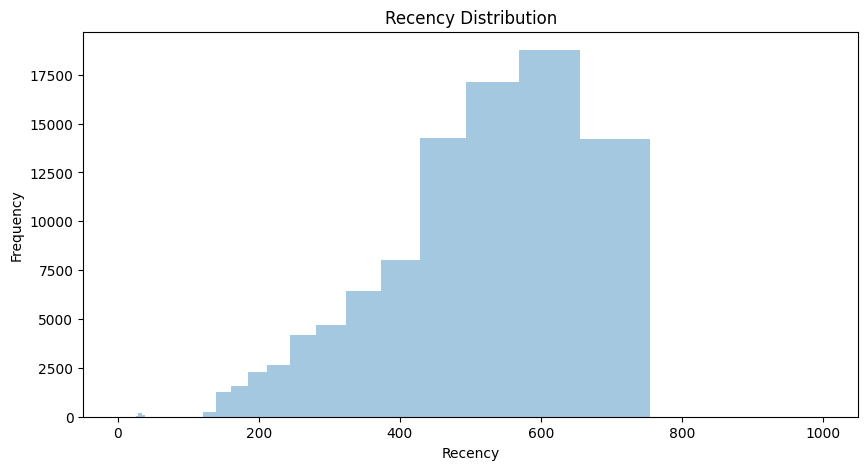

In [94]:
#recency distribution
plt.figure(figsize=(10,5))
sns.distplot(df['recency'], bins=np.logspace(0, 3, 50), kde=False)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

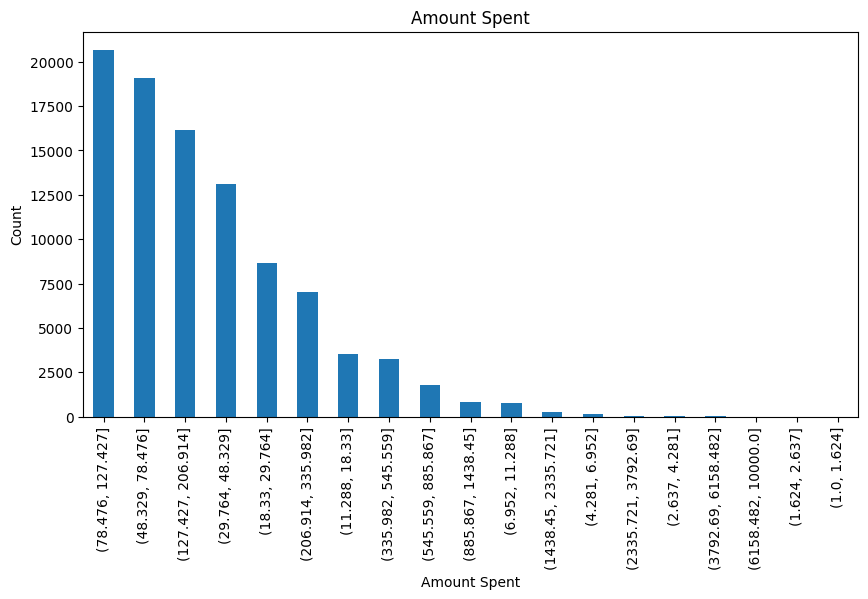

In [95]:
bins = np.logspace(0, 4, 20)

amount_categories = pd.cut(df['amount_spent'], bins)

counts = amount_categories.value_counts()

counts.plot.bar(figsize=(10,5))
plt.title('Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.show()

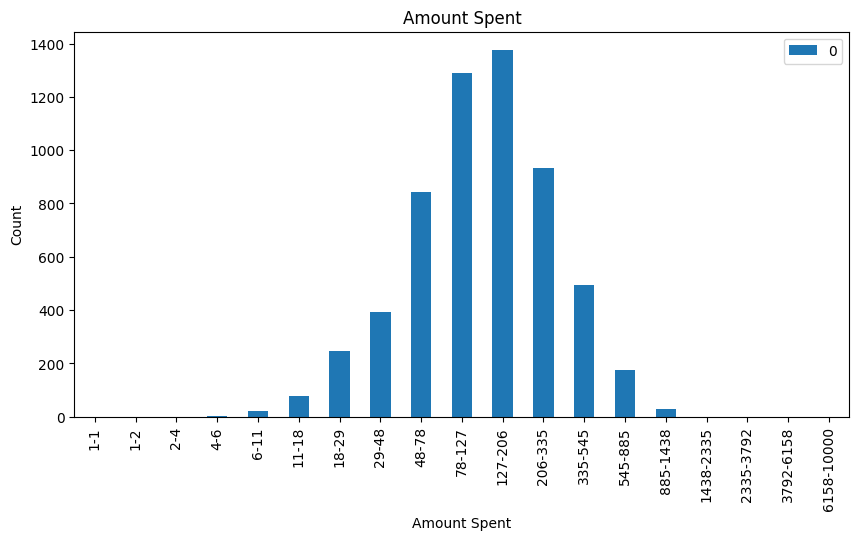

In [106]:
# Créer des intervalles de largeur égale pour les comptes de montants
amount_bins = np.logspace(0, 4, 20)

# Compter le nombre d'occurrences de chaque montant dans chaque intervalle
counts, bin_edges = np.histogram(df_1.loc[df_1['amount_spent']<1000, 'amount_spent'], bins=amount_bins)

# Nommer les colonnes du DataFrame des comptes de montants avec les bornes inférieures et supérieures des intervalles
columns = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]

# Créer un DataFrame à partir des comptes de montants et des noms de colonnes
counts_df = pd.DataFrame([counts], columns=columns)

#plot amount spent
counts_df.T.plot.bar(figsize=(10,5))
plt.title('Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Count')
plt.show()

In [107]:
df.columns

Index(['frequency', 'recency', 'amount_spent'], dtype='object')